In [1]:
# Importing necessary library functions & Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

### Reading the dataset from the local

In [2]:
df_train =  pd.read_csv('yellow_tripdata.csv', parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])

# list first few rows (datapoints)
df_train.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-12-01 00:12:00,2017-12-01 00:12:51,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
1,1,2017-12-01 00:13:37,2017-12-01 00:13:47,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
2,1,2017-12-01 00:14:15,2017-12-01 00:15:05,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
3,1,2017-12-01 00:15:33,2017-12-01 00:15:37,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,3.8
4,1,2017-12-01 00:50:03,2017-12-01 00:53:35,1,0.0,1,False,145,145,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3


### Basic summary of dataset

In [3]:
df_train.describe()

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06,9.508276e+06
mean,1.552153e+00,1.632386e+00,2.841248e+00,1.040817e+00,1.639006e+02,1.618380e+02,1.345665e+00,1.293521e+01,3.221178e-01,4.972710e-01,1.813980e+00,3.149101e-01,2.996154e-01,1.618621e+01
std,4.972727e-01,1.264036e+00,3.665802e+00,4.193037e-01,6.687440e+01,7.062320e+01,4.963531e-01,1.276011e+02,4.489527e-01,5.557419e-02,2.599233e+00,1.847027e+00,1.455794e-02,1.278660e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.400000e+02,-1.000000e+01,-5.000000e-01,-2.180000e+02,-1.900000e+01,-3.000000e-01,-3.403000e+02
25%,1.000000e+00,1.000000e+00,9.300000e-01,1.000000e+00,1.140000e+02,1.120000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.320000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,2.950000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,9.000000e+00,6.872200e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.919118e+05,6.980000e+01,1.178500e+02,4.960000e+02,9.758900e+02,1.000000e+00,3.919136e+05


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508276 entries, 0 to 9508275
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   ratecodeid             int64         
 6   store_and_fwd_flag     bool          
 7   pulocationid           int64         
 8   dolocationid           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
dtypes: bool(1), datetime64[ns](2), float64(8), int64(6)
memory usage:

In [5]:
# Convert int64 columns to int32
int_columns = df_train.select_dtypes(include=['int64']).columns
df_train[int_columns] = df_train[int_columns].astype('int32')

# Convert float64 columns to float32
float_columns = df_train.select_dtypes(include=['float64']).columns
df_train[float_columns] = df_train[float_columns].astype('float32')

# After conversion, you can check the memory usage again to see the difference
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508276 entries, 0 to 9508275
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float32       
 5   ratecodeid             int32         
 6   store_and_fwd_flag     bool          
 7   pulocationid           int32         
 8   dolocationid           int32         
 9   payment_type           int32         
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
dtypes: bool(1), datetime64[ns](2), float32(8), int32(6)
memory usage:

In [6]:
#Check null values
print(df_train.isnull().sum())

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


+ Reduction of memory consumed
+ Null values
+ Description of Number of float, int, datetime, bool

### EDA

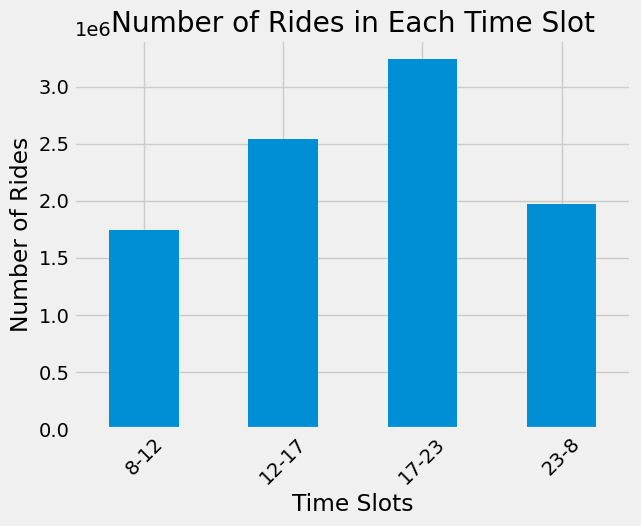

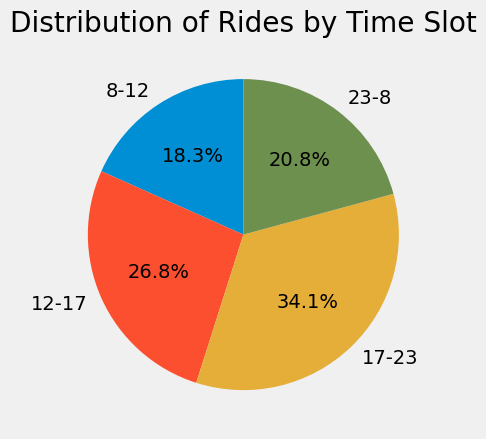

In [7]:
# Create a new column 'hour' that contains the hour of the 'tpep_pickup_datetime'
df_train['hour'] = df_train['tpep_pickup_datetime'].dt.hour

# Define a function to categorize hours into time slots
def categorize_hour(hour):
    if 8 <= hour < 12:
        return '8-12'
    elif 12 <= hour < 17:
        return '12-17'
    elif 17 <= hour < 23:
        return '17-23'
    else:
        return '23-8'

# Apply the function to create a new 'time_category' column
df_train['time_category'] = df_train['hour'].apply(categorize_hour)

# Count occurrences in each time slot
time_slot_counts = df_train['time_category'].value_counts()

# Plot the counts
time_slot_counts = time_slot_counts.reindex(['8-12', '12-17', '17-23', '23-8'])  # To maintain order

# Bar plot
time_slot_counts.plot(kind='bar')
plt.xlabel('Time Slots')
plt.ylabel('Number of Rides')
plt.title('Number of Rides in Each Time Slot')
plt.xticks(rotation=45)  # Improve label visibility
plt.show()

# Pie chart
time_slot_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Rides by Time Slot')
plt.ylabel('')  # This hides the 'time_category' label on the y-axis
plt.show()


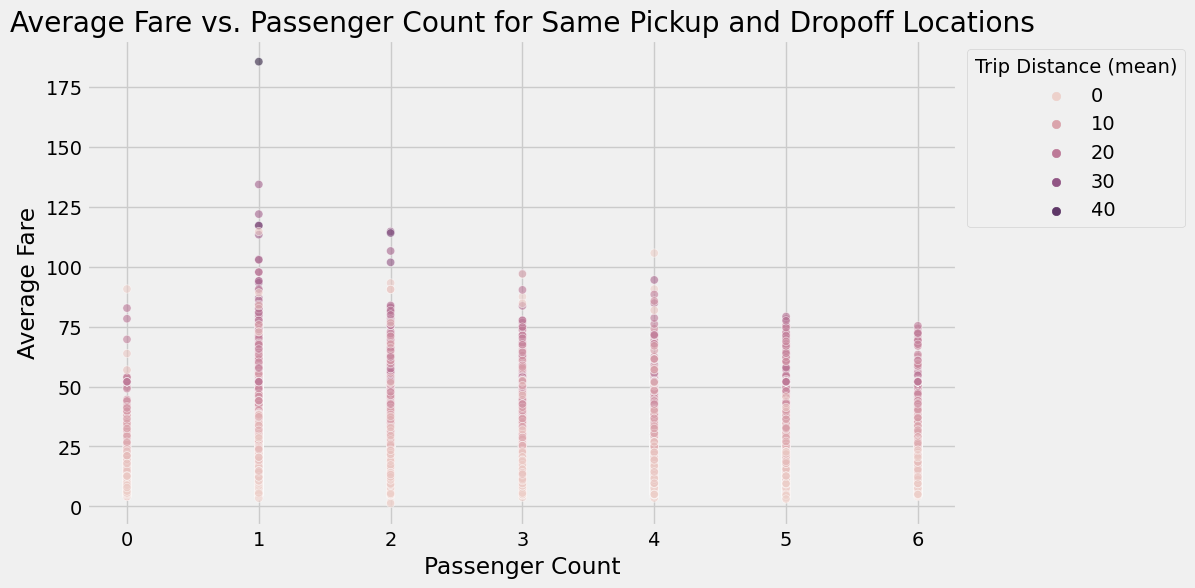

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by pickup and dropoff location ID, and passenger count
grouped = df_train.groupby(['pulocationid', 'dolocationid', 'passenger_count'])

# Calculate the average fare and number of trips for each group
grouped_stats = grouped.agg({
    'fare_amount': 'mean',  # Average fare
    'trip_distance': 'mean',  # Average distance might be useful for comparison
    'tpep_pickup_datetime': 'count'  # Count of trips
}).reset_index()

# Rename the columns for clarity
grouped_stats.rename(columns={'tpep_pickup_datetime': 'trip_count'}, inplace=True)

# Now let's filter out groups with very few trips to get more reliable statistics
# For instance, we might only consider groups with more than a certain number of trips
min_trips_threshold = 10  # Or any other number you deem sufficient
filtered_stats = grouped_stats[grouped_stats.trip_count > min_trips_threshold]

# Visualize the relationship between passenger count and average fare using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_stats, x='passenger_count', y='fare_amount', hue='trip_distance', alpha=0.6)
plt.title('Average Fare vs. Passenger Count for Same Pickup and Dropoff Locations')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare')
plt.legend(title='Trip Distance (mean)', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot
plt.grid(True)
plt.show()

# It might also be interesting to look at this relationship for specific popular routes
# For example, let's visualize the top 5 most frequent routes
top_routes = filtered_stats['trip_count'].nlargest(5).index
top_filtered_stats = filtered_stats.loc[top_routes]

# Now you can plot similar scatter plots or other plots for just these top routes
# ...


In [9]:
# Comparing passanger count with fare amount

#plt.figure(figsize=(20,8))
#sns.barplot(x=df_train["passenger_count"], y=df_train["fare_amount"], hue_order=True)

In [10]:
original_size = len(df_train)
df_nonzerofare = df_train[(df_train.fare_amount > 0) & (df_train.passenger_count > 0)]
filtered_size = len(df_nonzerofare)

print('Original size: %d' % original_size)
print('Filtered size: %d' % filtered_size)
print('Difference in rows: %d' % (original_size - filtered_size))


Original size: 9508276
Filtered size: 9442375
Difference in rows: 65901


In [11]:
# Comparing passanger count with fare amount

#plt.figure(figsize=(20,8))
#sns.barplot(x=df_nonzerofare["passenger_count"], y=df_nonzerofare["fare_amount"], hue_order=True)

1    6264460
2    3117773
3      47852
4      12290
Name: payment_type, dtype: int64
The most common payment type for non- zero-fare transactions is: 1 with 6264460 occurrences


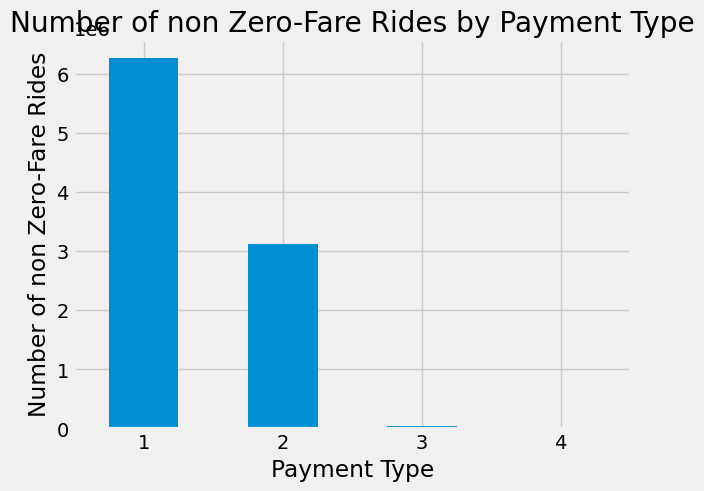

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

payment_type_counts_nonzero = df_nonzerofare['payment_type'].value_counts()

# Find the payment type with the most occurrences
most_common_payment_type = payment_type_counts_nonzero.idxmax()
most_common_payment_count = payment_type_counts_nonzero.max()

print(payment_type_counts_nonzero)
print(f"The most common payment type for non- zero-fare transactions is: {most_common_payment_type} with {most_common_payment_count} occurrences")

# Generate a bar plot
payment_type_counts_nonzero.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Number of non Zero-Fare Rides')
plt.title('Number of non Zero-Fare Rides by Payment Type')
plt.xticks(rotation=0)  # Keep the payment type labels horizontal
plt.show()

In [13]:
# Assuming 'df_train' is your DataFrame and it has been loaded previously

# Filter rows where fare_amount is less or equal to zero
zero_fare_data = df_train[df_train.fare_amount <= 0]

# Check for pickup and dropoff location frequencies
pickup_dropoff_same = zero_fare_data[zero_fare_data['pulocationid'] == zero_fare_data['dolocationid']]
unique_locations = zero_fare_data[['pulocationid', 'dolocationid']].drop_duplicates()

# Check for vendor analysis
vendor_counts = zero_fare_data['vendorid'].value_counts()

# Check for rate code analysis
ratecode_counts = zero_fare_data['ratecodeid'].value_counts()

# Check for payment type analysis
payment_type_counts = zero_fare_data['payment_type'].value_counts()
print("type count", payment_type_counts)
# Check for non-zero associated charges
associated_charges = zero_fare_data[['mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']].sum()

# Check for any temporal patterns
# Create a copy of the slice to avoid the SettingWithCopyWarning
zero_fare_data = df_train[df_train.fare_amount <= 0].copy()

# Now that zero_fare_data is a copy, we can safely make changes without affecting df_train
zero_fare_data['tpep_pickup_datetime'] = pd.to_datetime(zero_fare_data['tpep_pickup_datetime'])
zero_fare_data['tpep_dropoff_datetime'] = pd.to_datetime(zero_fare_data['tpep_dropoff_datetime'])
zero_fare_data['pickup_hour'] = zero_fare_data['tpep_pickup_datetime'].dt.hour

hourly_distribution = zero_fare_data['pickup_hour'].value_counts().sort_index()

type count 3    4157
4    1675
2    1116
1     636
Name: payment_type, dtype: int64


+ Looks like type 3 payment type has majority of the zero valued count

In [14]:
# Assuming zero_fare_data is a DataFrame containing only the rows where fare_amount <= 0
# We will use 'payment_type' as the column that contains the information about payment methods

# Get the count of each payment type for zero-fare transactions
payment_type_counts = zero_fare_data['payment_type'].value_counts()

# Find the payment type with the most occurrences
most_common_payment_type = payment_type_counts.idxmax()
most_common_payment_count = payment_type_counts.max()

print(payment_type_counts)
print(f"The most common payment type for zero-fare transactions is: {most_common_payment_type} with {most_common_payment_count} occurrences")


3    4157
4    1675
2    1116
1     636
Name: payment_type, dtype: int64
The most common payment type for zero-fare transactions is: 3 with 4157 occurrences


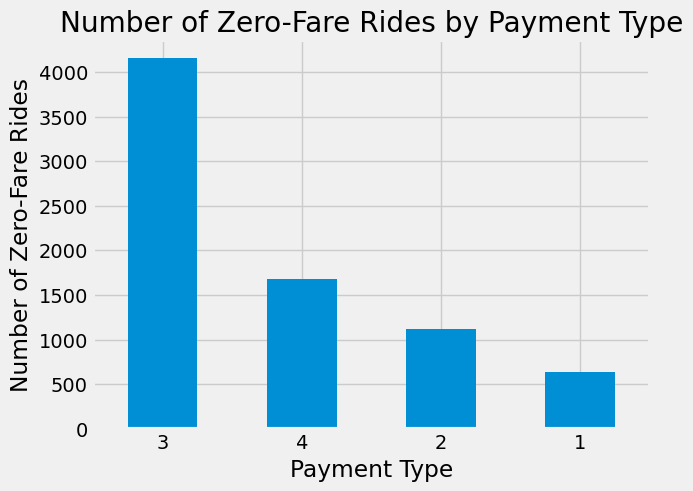

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a bar plot
payment_type_counts.plot(kind='bar')
plt.xlabel('Payment Type')
plt.ylabel('Number of Zero-Fare Rides')
plt.title('Number of Zero-Fare Rides by Payment Type')
plt.xticks(rotation=0)  # Keep the payment type labels horizontal
plt.show()


Text(0.5, 1.0, 'Histogram of fare amounts from zero to 100')

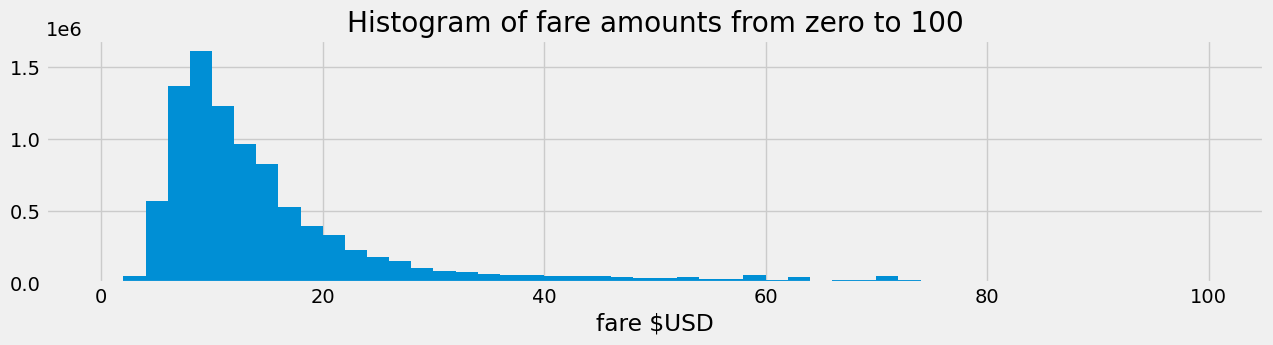

In [16]:
# plot histogram of basic fare
df_nonzerofare[df_nonzerofare.total_amount<100].total_amount.hist(bins=50, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram of fare amounts from zero to 100')

In [17]:
df_nonzerofare['total_amount'] = np.log1p(df_nonzerofare['total_amount'])

C:\Users\jegad\AppData\Local\Temp\ipykernel_9344\2162347461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzerofare['total_amount'] = np.log1p(df_nonzerofare['total_amount'])


Text(0.5, 1.0, 'Histogram of fare amounts from zero to 100')

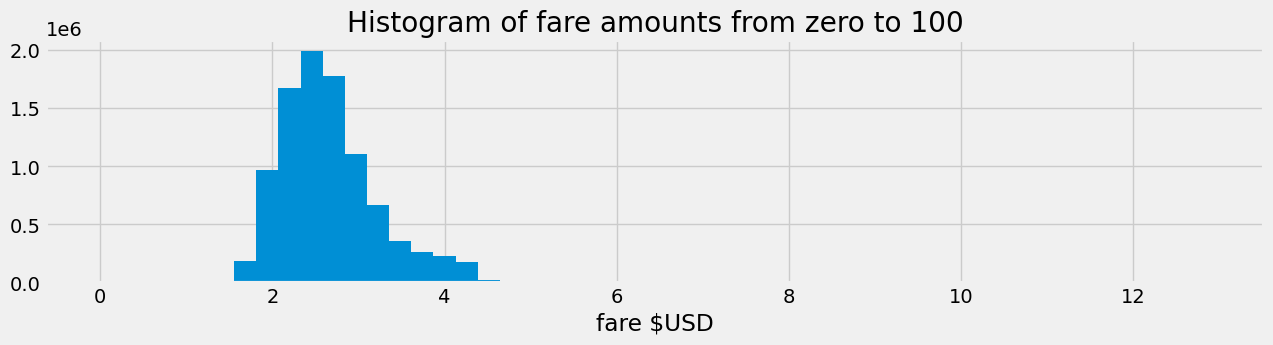

In [18]:
# plot histogram of basic fare
df_nonzerofare[df_nonzerofare.total_amount<100].total_amount.hist(bins=50, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram of fare amounts from zero to 100')

+ Observation: It looks like a log normal distribution

Text(0.5, 1.0, 'Top 10 Pickup Locations')

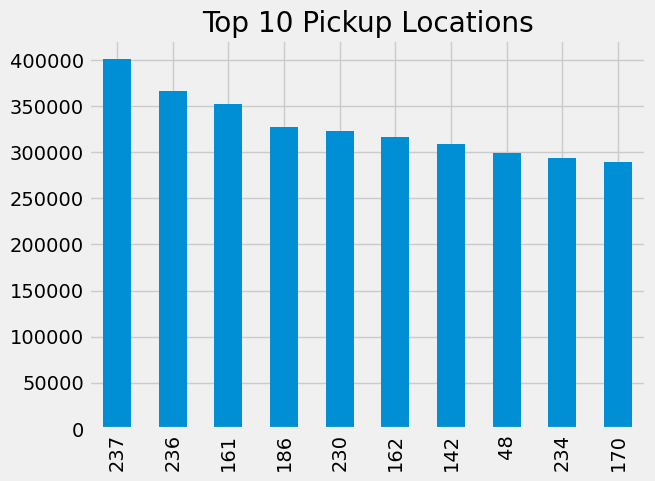

In [19]:
df_train['pulocationid'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Pickup Locations')

In [20]:
df_nonzerofare["time_taken"] = (df_nonzerofare["tpep_dropoff_datetime"] - df_nonzerofare["tpep_pickup_datetime"]).dt.total_seconds() / 60

column_order = list(df_nonzerofare.columns) 
df_EDA = df_nonzerofare[column_order]
df_EDA.head()

C:\Users\jegad\AppData\Local\Temp\ipykernel_9344\1897483713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzerofare["time_taken"] = (df_nonzerofare["tpep_dropoff_datetime"] - df_nonzerofare["tpep_pickup_datetime"]).dt.total_seconds() / 60


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour,time_category,time_taken
0,1,2017-12-01 00:12:00,2017-12-01 00:12:51,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.850000
1,1,2017-12-01 00:13:37,2017-12-01 00:13:47,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.166667
2,1,2017-12-01 00:14:15,2017-12-01 00:15:05,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.833333
3,1,2017-12-01 00:15:33,2017-12-01 00:15:37,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.066667
4,1,2017-12-01 00:50:03,2017-12-01 00:53:35,1,0.0,1,False,145,145,2,4.0,0.5,0.5,0.0,0.0,0.3,1.840550,0,23-8,3.533333


In [21]:
duplicates = df_EDA.columns[df_EDA.columns.duplicated(keep='first')]

# Remove the duplicated "time_taken" columns
for col in duplicates:
    if col == "time_taken":
        df_EDA = df_EDA.loc[:, ~df_EDA.columns.duplicated(keep='first')]

df_EDA.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour,time_category,time_taken
0,1,2017-12-01 00:12:00,2017-12-01 00:12:51,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.850000
1,1,2017-12-01 00:13:37,2017-12-01 00:13:47,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.166667
2,1,2017-12-01 00:14:15,2017-12-01 00:15:05,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.833333
3,1,2017-12-01 00:15:33,2017-12-01 00:15:37,1,0.0,1,False,226,226,3,2.5,0.5,0.5,0.0,0.0,0.3,1.568616,0,23-8,0.066667
4,1,2017-12-01 00:50:03,2017-12-01 00:53:35,1,0.0,1,False,145,145,2,4.0,0.5,0.5,0.0,0.0,0.3,1.840550,0,23-8,3.533333


### Data Cleaning

In [22]:
def clean_trip_duration(df_EDA):
    # compute the time diffrance between pickup & dropoff time and 
    # covert from nanosecondes to minutes we devide by 1000000000 then by 60
    # store trip_duratin column
    trip_duration = np.array(df_EDA['tpep_dropoff_datetime'] - df_EDA['tpep_pickup_datetime'])
    trip_duration = trip_duration/1000000000/60
    df_EDA['trip_duration'] = trip_duration.astype(float)
    
    nrows = df_EDA.shape[0]
    df_EDA.drop(
        df_EDA[ (df_EDA['trip_duration'] > 160) | (df_EDA['trip_duration'] <= 0)].index, 
        inplace = True
    )
    
    print("Number of rows removed due to wrong trip_duration {}".format(nrows - df_EDA.shape[0]))

    return df_EDA
    
    
df_clean = clean_trip_duration(df_EDA)

Number of rows removed due to wrong trip_duration 96592


In [23]:
def clean_trip_distance(df_EDA):
    nrows = df_EDA.shape[0]
    df_EDA.drop(
        df_EDA[(df_EDA['trip_distance'] <= 0) | (df_EDA['trip_distance'] > 77.5)].index, 
        inplace = True
    )
    print("Number of rows removed due to speed outliers {}".format(nrows - df_EDA.shape[0]))

    return df_EDA

df_clean = clean_trip_duration(df_EDA)

Number of rows removed due to wrong trip_duration 0


In [24]:
def compute_speed(df_EDA):

    df_EDA['speed'] = df_EDA['trip_distance']/df_EDA['trip_duration']*60

    return df_EDA
    
def clean_speed(df_EDA):

    # Removing speed anomaly/outliers
    nrows = df_EDA.shape[0]
    df_EDA.drop(df_EDA[((df_EDA['speed'] <= 0) | (df_EDA['speed'] > 63.0))].index, inplace = True)
    print("Number of rows removed due to speed outliers {}".format(nrows - df_EDA.shape[0]))

    return df_EDA

df_clean = compute_speed(df_clean)
df_clean = clean_speed(df_clean)


Number of rows removed due to speed outliers 12824


### Feature engineering

In [25]:
df_clean.total_amount[(df_clean.total_amount <= 0) | (df_clean.total_amount >= 350)].count()

0

In [26]:
print(f'Row count before elimination - {df_clean.shape[0]}')
df_clean = df_clean[df_clean.total_amount.between(0, 350, inclusive='neither')]
print(f'Row count after elimination - {df_clean.shape[0]}')

Row count before elimination - 9332959
Row count after elimination - 9332959


In [27]:
df_clean.passenger_count[(df_clean.passenger_count < 1) | (df_clean.passenger_count > 8)].count()

11

In [28]:
print(f'Row count before elimination - {df_clean.shape[0]}')
df_clean = df_clean[df_clean.passenger_count.between(0, 8, inclusive='neither')]
print(f'Row count after elimination - {df_clean.shape[0]}')

Row count before elimination - 9332959
Row count after elimination - 9332938


In [29]:
df_clean['total_amount'] = np.log1p(df_clean['total_amount'])

In [30]:
# Convert 'store_and_fwd_flag' to a categorical type and then to its corresponding codes
df_clean['store_and_fwd_flag'] = df_clean['store_and_fwd_flag'].astype('category')
df_clean['store_and_fwd_flag'] = df_clean['store_and_fwd_flag'].cat.codes

# Do the same for 'vendorid'
df_clean['vendorid'] = df_clean['vendorid'].astype('category')
df_clean['vendorid'] = df_clean['vendorid'].cat.codes


In [31]:
df_clean['month'] = df_clean.tpep_pickup_datetime.dt.month
# Correcting the deprecated week attribute to the suggested isocalendar().week
df_clean['week'] = df_clean.tpep_pickup_datetime.dt.isocalendar().week
df_clean['weekday'] = df_clean.tpep_pickup_datetime.dt.weekday
df_clean['hour'] = df_clean.tpep_pickup_datetime.dt.hour
df_clean['minute'] = df_clean.tpep_pickup_datetime.dt.minute
# Using df_clean['minute'] instead of new_data['minute']
df_clean['minute_of_the_day'] = df_clean['hour'] * 60 + df_clean['minute']
df_clean.drop(['minute'], axis=1, inplace=True)
df_clean.head(20)


,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,...,total_amount,hour,time_category,time_taken,trip_duration,speed,month,week,weekday,minute_of_the_day
5,0,2017-12-01 00:14:20,2017-12-01 00:28:35,1,4.20,1,0,82,258,2,...,1.348257,0,23-8,14.250000,14.0,17.999999,12,48,4,14
6,0,2017-12-01 00:20:32,2017-12-01 00:31:24,1,5.40,1,0,50,116,2,...,1.376271,0,23-8,10.866667,10.0,32.400001,12,48,4,20
7,0,2017-12-01 00:01:46,2017-12-01 00:12:19,1,1.90,1,0,161,107,1,...,1.278575,0,23-8,10.550000,10.0,11.400000,12,48,4,1
8,0,2017-12-01 00:17:52,2017-12-01 00:32:35,1,3.30,1,0,107,263,1,...,1.341699,0,23-8,14.716667,14.0,14.142857,12,48,4,17
9,0,2017-12-01 00:10:00,2017-12-01 00:24:35,1,2.80,1,0,264,87,1,...,1.342935,0,23-8,14.583333,14.0,12.000000,12,48,4,10
10,0,2017-12-01 00:03:14,2017-12-01 00:30:47,1,10.30,1,0,138,237,1,...,1.582741,0,23-8,27.550000,27.0,22.888889,12,48,4,3
11,0,2017-12-01 00:01:15,2017-12-01 00:34:36,1,9.50,1,0,232,167,3,...,1.511857,0,23-8,33.350000,33.0,17.272727,12,48,4,1
12,1,2017-12-01 00:40:04,2017-12-01 00:50:13,1,2.09,1,0,166,116,2,...,1.255502,0,23-8,10.150000,10.0,12.539999,12,48,4,40
13,0,2017-12-01 00:43:35,2017-12-01 00:56:14,1,3.90,1,0,226,95,2,...,1.332673,0,23-8,12.650000,12.0,19.500000,12,48,4,43
14,0,2017-12-01 00:09:32,2017-12-01 00:30:05,1,2.80,1,0,163,186,1,...,1.384600,0,23-8,20.550000,20.0,8.400000,12,48,4,9


### Correlation and dimensionality reduction

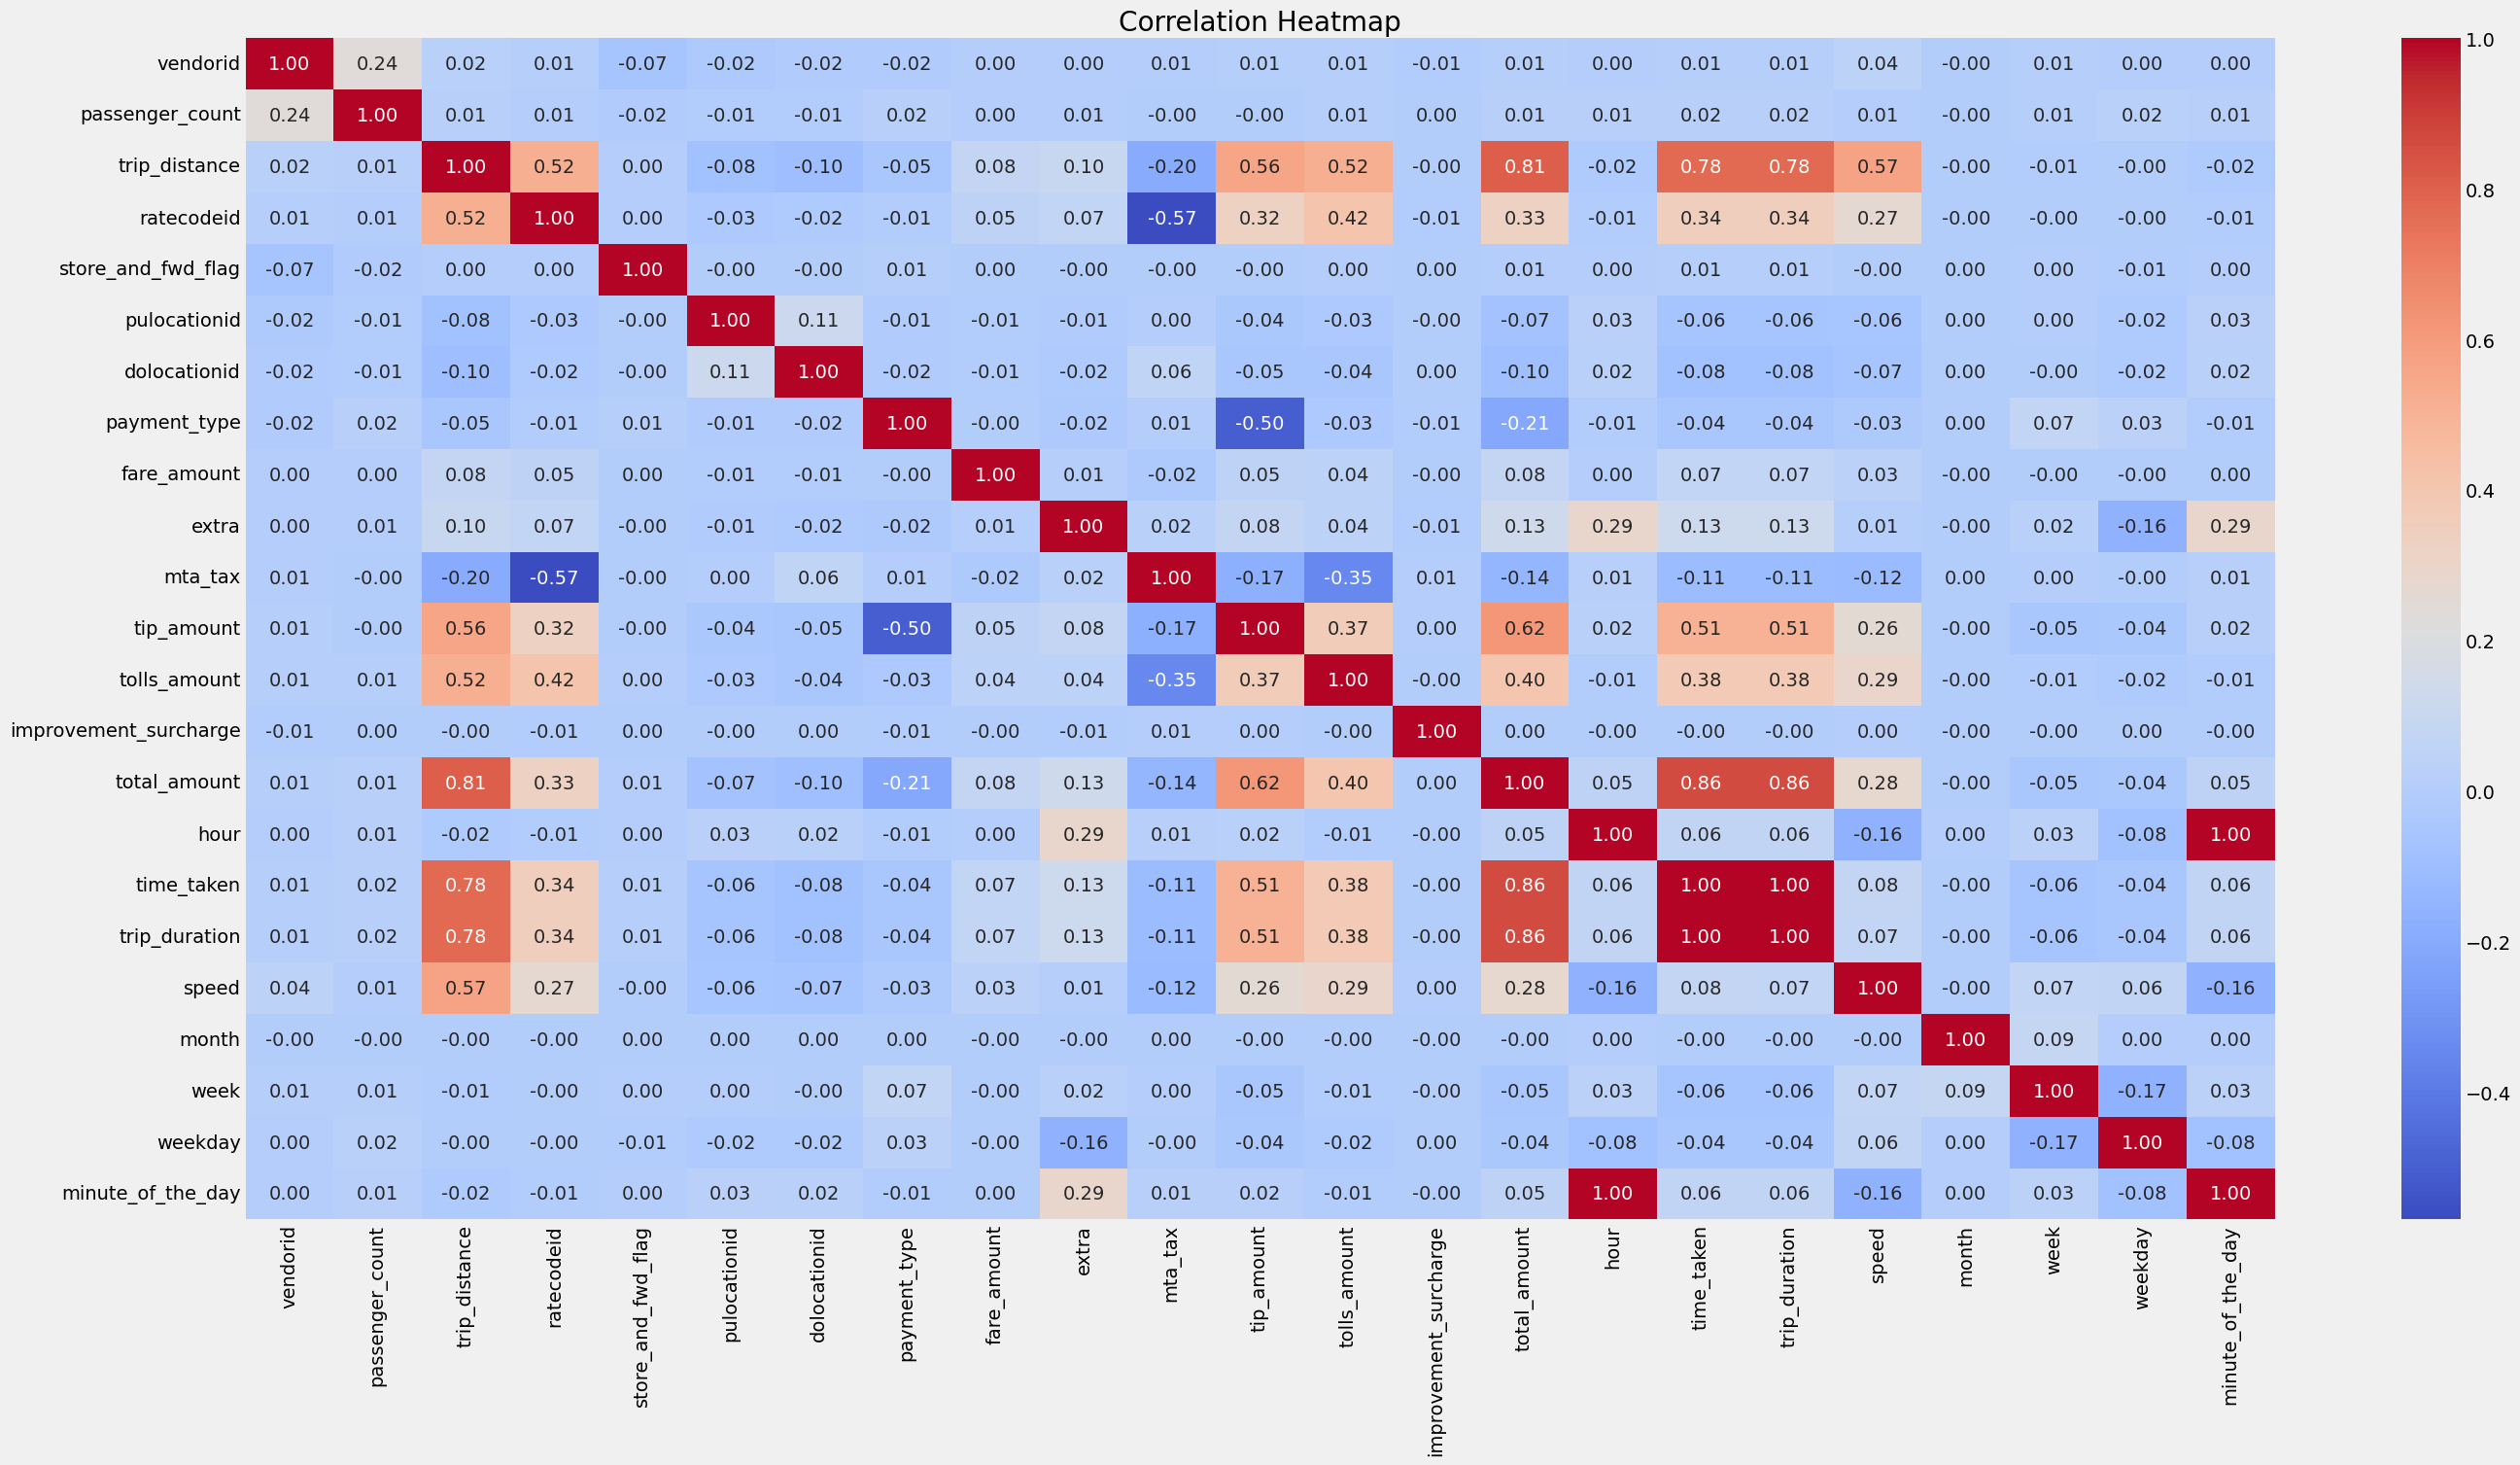

In [32]:
import seaborn as sns
# Calculate correlation matrix

corr_matrix = df_clean.corr()

# Plot the heatmap with color mapping
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('Pearson correlation_heatmap.png', dpi=300) 
plt.show()

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9332938 entries, 5 to 9508275
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int8          
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int32         
 4   trip_distance          float32       
 5   ratecodeid             int32         
 6   store_and_fwd_flag     int8          
 7   pulocationid           int32         
 8   dolocationid           int32         
 9   payment_type           int32         
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  hour                   int64         
 18  time_category         

### Train and Test model

In [34]:
#!pip install lightgbm

In [35]:
from math import sqrt
import lightgbm as lgb
from scipy.stats import skew
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
selected_predictors = [
    'vendorid', 
    'passenger_count', 
    'trip_distance', 
    'ratecodeid',
    'store_and_fwd_flag',
    'pulocationid',
    'dolocationid',
    'payment_type',
    'hour',
    'month',
    'time_taken'
]

X = df_clean.loc[:, selected_predictors].values
y = df_clean['total_amount'].values

# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(
                          X, y,  
                          random_state=104, 
                          train_size=0.001, 
                          shuffle=True
)

### Test and train for Time taken

In [36]:
selected_predictors1 = [
    'vendorid', 
    'passenger_count', 
    'trip_distance', 
    'ratecodeid',
    'store_and_fwd_flag',
    'pulocationid',
    'dolocationid',
    'payment_type',
    'hour',
    'month'
]

A = df_clean.loc[:, selected_predictors1].values
b = df_clean['time_taken'].values

# using the train test split function 
A_train, A_test, b_train, b_test = train_test_split(
                          A, b,  
                          random_state=104, 
                          train_size=0.001, 
                          shuffle=True
)

### ML Algorithms

In [37]:
rand_forest_regressor = RandomForestRegressor()
rand_forest_regressor.fit(X_train, y_train)

y_rand_forest_predict = rand_forest_regressor.predict(X_test)

random_forest_mae = mean_absolute_error(y_test,y_rand_forest_predict)
random_forest_mse = mean_squared_error(y_test,y_rand_forest_predict)
random_forest_rmsel = np.log(np.sqrt(mean_squared_error(y_test,y_rand_forest_predict)))
random_forest_r2 = r2_score(y_test,y_rand_forest_predict)

print(f' Random Forest Mean Squared Error - {random_forest_mse}')
print(f' Random Forest Mean Absolute Error - {random_forest_mae}')
print(f' Random Forest Root Mean Squared Log Error - {random_forest_rmsel}')
print(f' Random Forest R Squared Error - {random_forest_r2}')

RM_final_score = {
    "Metrics": ["RF_MSE", "RF_MAE", "RF_RMSE", "RF_R2"],
    "Score": [random_forest_mse, random_forest_mae, random_forest_rmsel, random_forest_r2]
}
df_RM_score = pd.DataFrame(RM_final_score)

 Random Forest Mean Squared Error - 0.0005020717533265473
 Random Forest Mean Absolute Error - 0.013728264767902539
 Random Forest Root Mean Squared Log Error - -3.798383756786663
 Random Forest R Squared Error - 0.9764114956129728


### RF for Time taken

In [38]:
rand_forest_regressor = RandomForestRegressor()
rand_forest_regressor.fit(A_train, b_train)

b_rand_forest_predict = rand_forest_regressor.predict(A_test)

brandom_forest_mae = mean_absolute_error(b_test,b_rand_forest_predict)
brandom_forest_mse = mean_squared_error(b_test,b_rand_forest_predict)
brandom_forest_rmsel = np.log(np.sqrt(mean_squared_error(b_test,b_rand_forest_predict)))
brandom_forest_r2 = r2_score(b_test,b_rand_forest_predict)

print(f' Random Forest Mean Squared Error - {brandom_forest_mse}')
print(f' Random Forest Mean Absolute Error - {brandom_forest_mae}')
print(f' Random Forest Root Mean Squared Log Error - {brandom_forest_rmsel}')
print(f' Random Forest R Squared Error - {brandom_forest_r2}')

RM_final_score1 = {
    "Metrics": ["RF_MSE", "RF_MAE", "RF_RMSE", "RF_R2"],
    "Score": [brandom_forest_mse, brandom_forest_mae, brandom_forest_rmsel, brandom_forest_r2]
}
df_RM_score1 = pd.DataFrame(RM_final_score1)

 Random Forest Mean Squared Error - 38.958169009380484
 Random Forest Mean Absolute Error - 4.057007397100822
 Random Forest Root Mean Squared Log Error - 1.831244240495405
 Random Forest R Squared Error - 0.7213051047601882


In [39]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)

y_XGB_predict = XGB_model.predict(X_test)

XGB_model_mae = mean_absolute_error(y_test,y_XGB_predict)
XGB_model_mse = mean_squared_error(y_test,y_XGB_predict)
XGB_model_rmsel = np.log(np.sqrt(mean_squared_error(y_test,y_XGB_predict)))
XGB_model_r2 = r2_score(y_test,y_XGB_predict)

print(f' XGBoost Mean Squared Error - {XGB_model_mse}')
print(f' XGBoost Mean Absolute Error - {XGB_model_mae}')
print(f' XGBoost Root Mean Squared Log Error - {XGB_model_rmsel}')
print(f' XGBoost R Squared Error - {XGB_model_r2}')

XGB_final_score = {
    "Metrics": ["XGB_MSE", "XGB_MAE", "XGB_RMSE", "XGB_R2"],
    "Score": [XGB_model_mse, XGB_model_mae, XGB_model_rmsel, XGB_model_r2]
}
df_XGB_score = pd.DataFrame(XGB_final_score)

 XGBoost Mean Squared Error - 0.0004759039729833603
 XGBoost Mean Absolute Error - 0.013721245341002941
 XGBoost Root Mean Squared Log Error - -3.8251471519470215
 XGBoost R Squared Error - 0.9776409090665271


In [40]:
# Hyperparameter

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.5]
max_depth.append(None)

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate
}

XGB_model = XGBRegressor()
XGB_random = RandomizedSearchCV(estimator = XGB_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
XGB_random.fit(X_train, y_train)
XGB_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1600, 'max_depth': 5, 'learning_rate': 0.01}

In [41]:
XGB_model = XGBRegressor(**XGB_random.best_params_)
XGB_model.fit(X_train, y_train)

y_XGB_predict = XGB_model.predict(X_test)

XGB_model_mae = mean_absolute_error(y_test,y_XGB_predict)
XGB_model_mse = mean_squared_error(y_test,y_XGB_predict)
XGB_model_rmsel = np.log(np.sqrt(mean_squared_error(y_test,y_XGB_predict)))
XGB_model_r2 = r2_score(y_test,y_XGB_predict)

print(f' XGBoost Mean Squared Error - {XGB_model_mse}')
print(f' XGBoost Mean Absolute Error - {XGB_model_mae}')
print(f' XGBoost Root Mean Squared Log Error - {XGB_model_rmsel}')
print(f' XGBoost R Squared Error - {XGB_model_r2}')

XGB_final_score = {
    "Metrics": ["XGB_MSE", "XGB_MAE", "XGB_RMSE", "XGB_R2"],
    "Score": [XGB_model_mse, XGB_model_mae, XGB_model_rmsel, XGB_model_r2]
}
df_XGB_score = pd.DataFrame(XGB_final_score)

 XGBoost Mean Squared Error - 0.00044324868940748274
 XGBoost Mean Absolute Error - 0.012911628931760788
 XGBoost Root Mean Squared Log Error - -3.860689878463745
 XGBoost R Squared Error - 0.9791751513773534


### XGB of Time taken

In [42]:
XGB_model = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=1000)
XGB_model.fit(A_train, b_train)

b_XGB_predict = XGB_model.predict(A_test)

bXGB_model_mae = mean_absolute_error(b_test,b_XGB_predict)
bXGB_model_mse = mean_squared_error(b_test,b_XGB_predict)
bXGB_model_rmsel = np.log(np.sqrt(mean_squared_error(b_test,b_XGB_predict)))
bXGB_model_r2 = r2_score(b_test,b_XGB_predict)

print(f' XGBoost Mean Squared Error - {bXGB_model_mse}')
print(f' XGBoost Mean Absolute Error - {bXGB_model_mae}')
print(f' XGBoost Root Mean Squared Log Error - {bXGB_model_rmsel}')
print(f' XGBoost R Squared Error - {bXGB_model_r2}')

XGB_final_score1 = {
    "Metrics": ["XGB_MSE", "XGB_MAE", "XGB_RMSE", "XGB_R2"],
    "Score": [bXGB_model_mse, bXGB_model_mae, bXGB_model_rmsel, bXGB_model_r2]
}
df_XGB_score1 = pd.DataFrame(XGB_final_score1)

 XGBoost Mean Squared Error - 42.933971609866724
 XGBoost Mean Absolute Error - 4.305448382970031
 XGBoost Root Mean Squared Log Error - 1.879831695790539
 XGBoost R Squared Error - 0.6928634218625682


In [43]:
lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=1000)
lgb_model.fit(X_train, y_train)

y_LGB_predict = lgb_model.predict(X_test)

LGB_model_mae = mean_absolute_error(y_test,y_LGB_predict)
LGB_model_mse = mean_squared_error(y_test,y_LGB_predict)
LGB_model_rmsel = np.log(np.sqrt(mean_squared_error(y_test,y_LGB_predict)))
LGB_model_r2 = r2_score(y_test,y_LGB_predict)

print(f' LGBMRegressor Mean Squared Error - {LGB_model_mse}')
print(f' LGBMRegressor Mean Absolute Error - {LGB_model_mae}')
print(f' LGBMRegressor Root Mean Squared Log Error - {LGB_model_rmsel}')
print(f' LGBMRegressor R Squared Error - {LGB_model_r2}')

LGB_final_score = {
    "Metrics": ["LGB_MSE", "LGB_MAE", "LGB_RMSE", "LGB_R2"],
    "Score": [LGB_model_mse, LGB_model_mae, LGB_model_rmsel, LGB_model_r2]
}
df_LGB_score = pd.DataFrame(LGB_final_score)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 778
[LightGBM] [Info] Number of data points in the train set: 9332, number of used features: 10
[LightGBM] [Info] Start training from score 1.284450
 LGBMRegressor Mean Squared Error - 0.0004959329743500012
 LGBMRegressor Mean Absolute Error - 0.013835108258862385
 LGBMRegressor Root Mean Squared Log Error - -3.8045348863647073
 LGBMRegressor R Squared Error - 0.9766999097965229


### LBG of Time taken

In [44]:
lgb_model = lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=1000)
lgb_model.fit(A_train, b_train)

b_LGB_predict = lgb_model.predict(A_test)

bLGB_model_mae = mean_absolute_error(b_test,b_LGB_predict)
bLGB_model_mse = mean_squared_error(b_test,b_LGB_predict)
bLGB_model_rmsel = np.log(np.sqrt(mean_squared_error(b_test,b_LGB_predict)))
bLGB_model_r2 = r2_score(b_test,b_LGB_predict)

print(f' LGBMRegressor Mean Squared Error - {bLGB_model_mse}')
print(f' LGBMRegressor Mean Absolute Error - {bLGB_model_mae}')
print(f' LGBMRegressor Root Mean Squared Log Error - {bLGB_model_rmsel}')
print(f' LGBMRegressor R Squared Error - {bLGB_model_r2}')

LGB_final_score1 = {
    "Metrics": ["LGB_MSE", "LGB_MAE", "LGB_RMSE", "LGB_R2"],
    "Score": [bLGB_model_mse, bLGB_model_mae, bLGB_model_rmsel, bLGB_model_r2]
}
df_LGB_score1 = pd.DataFrame(LGB_final_score1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 9332, number of used features: 9
[LightGBM] [Info] Start training from score 14.689947
 LGBMRegressor Mean Squared Error - 39.47273004707511
 LGBMRegressor Mean Absolute Error - 4.023699626383306
 LGBMRegressor Root Mean Squared Log Error - 1.8378050274655005
 LGBMRegressor R Squared Error - 0.7176240915570198


In [45]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_lr_predict = reg.predict(X_test)

LR_model_mae = mean_absolute_error(y_test,y_lr_predict)
LR_model_mse = mean_squared_error(y_test,y_lr_predict)
LR_model_rmsel = np.log(np.sqrt(mean_squared_error(y_test,y_lr_predict)))
LR_model_r2 = r2_score(y_test,y_lr_predict)

print(f' LinearRegressor Mean Squared Error - {LR_model_mse}')
print(f' LinearRegressor Mean Absolute Error - {LR_model_mae}')
print(f' LinearRegressor Root Mean Squared Log Error - {LR_model_rmsel}')
print(f' LinearRegressor R Squared Error - {LR_model_r2}')

LR_final_score = {
    "Metrics": ["LR_MSE", "LR_MAE", "LR_RMSE", "LR_R2"],
    "Score": [LR_model_mse, LR_model_mae, LR_model_rmsel, LR_model_r2]
}
df_LR_score = pd.DataFrame(LR_final_score)

 LinearRegressor Mean Squared Error - 0.0037240254773480055
 LinearRegressor Mean Absolute Error - 0.044179670922643466
 LinearRegressor Root Mean Squared Log Error - -2.796475039098796
 LinearRegressor R Squared Error - 0.8250365794773346


### Linear regression of Time taken

In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(A_train, b_train)
b_lr_predict = reg.predict(A_test)

bLR_model_mae = mean_absolute_error(b_test,b_lr_predict)
bLR_model_mse = mean_squared_error(b_test,b_lr_predict)
bLR_model_rmsel = np.log(np.sqrt(mean_squared_error(b_test,b_lr_predict)))
bLR_model_r2 = r2_score(b_test,b_lr_predict)

print(f' LinearRegressor Mean Squared Error - {bLR_model_mse}')
print(f' LinearRegressor Mean Absolute Error - {bLR_model_mae}')
print(f' LinearRegressor Root Mean Squared Log Error - {bLR_model_rmsel}')
print(f' LinearRegressor R Squared Error - {bLR_model_r2}')

LR_final_score1 = {
    "Metrics": ["LR_MSE", "LR_MAE", "LR_RMSE", "LR_R2"],
    "Score": [bLR_model_mse, bLR_model_mae, bLR_model_rmsel, bLR_model_r2]
}
df_LR_score1 = pd.DataFrame(LR_final_score1)

 LinearRegressor Mean Squared Error - 53.963053290956296
 LinearRegressor Mean Absolute Error - 5.05290277004592
 LinearRegressor Root Mean Squared Log Error - 1.994149807039082
 LinearRegressor R Squared Error - 0.6139647250844297


In [47]:
df_score = pd.concat([df_RM_score, df_XGB_score, df_LGB_score, df_LR_score], axis=0, ignore_index=True)
df_score

,Metrics,Score
0,RF_MSE,0.000502
1,RF_MAE,0.013728
2,RF_RMSE,-3.798384
3,RF_R2,0.976411
4,XGB_MSE,0.000443
5,XGB_MAE,0.012912
6,XGB_RMSE,-3.860690
7,XGB_R2,0.979175
8,LGB_MSE,0.000496
9,LGB_MAE,0.013835


In [48]:
df_score1 = pd.concat([df_RM_score1, df_XGB_score1, df_LGB_score1, df_LR_score1], axis=0, ignore_index=True)
df_score1

,Metrics,Score
0,RF_MSE,38.958169
1,RF_MAE,4.057007
2,RF_RMSE,1.831244
3,RF_R2,0.721305
4,XGB_MSE,42.933972
5,XGB_MAE,4.305448
6,XGB_RMSE,1.879832
7,XGB_R2,0.692863
8,LGB_MSE,39.472730
9,LGB_MAE,4.023700


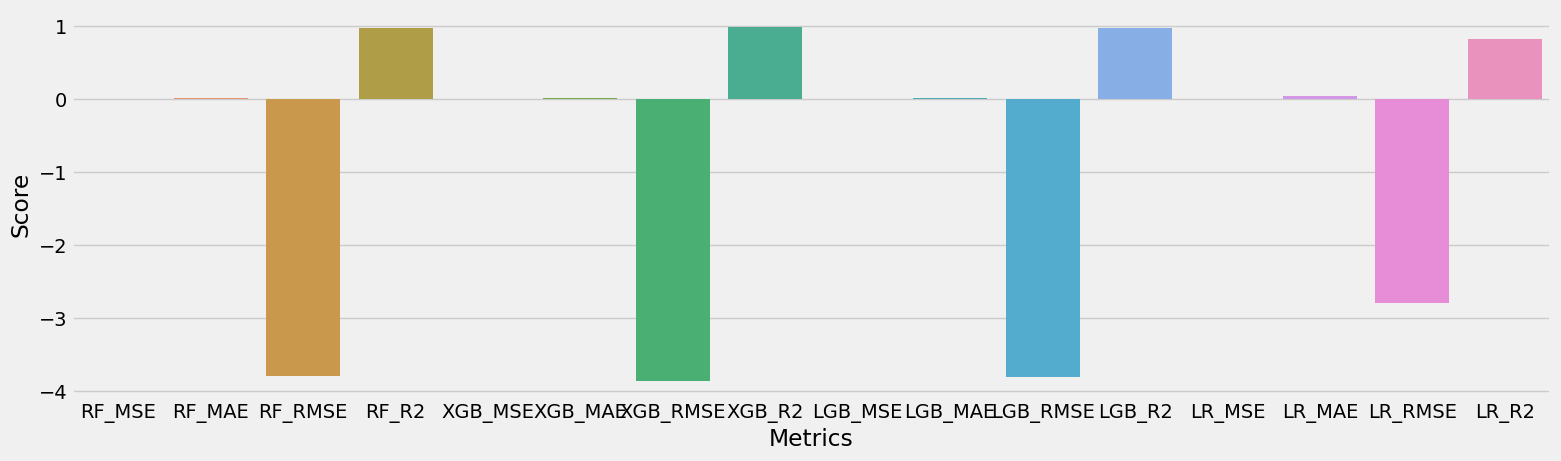

In [49]:
import matplotlib.pyplot as plt
plt.figure().set_figwidth(17)
sns.barplot(x = 'Metrics',y = 'Score', data = df_score)
plt.show()

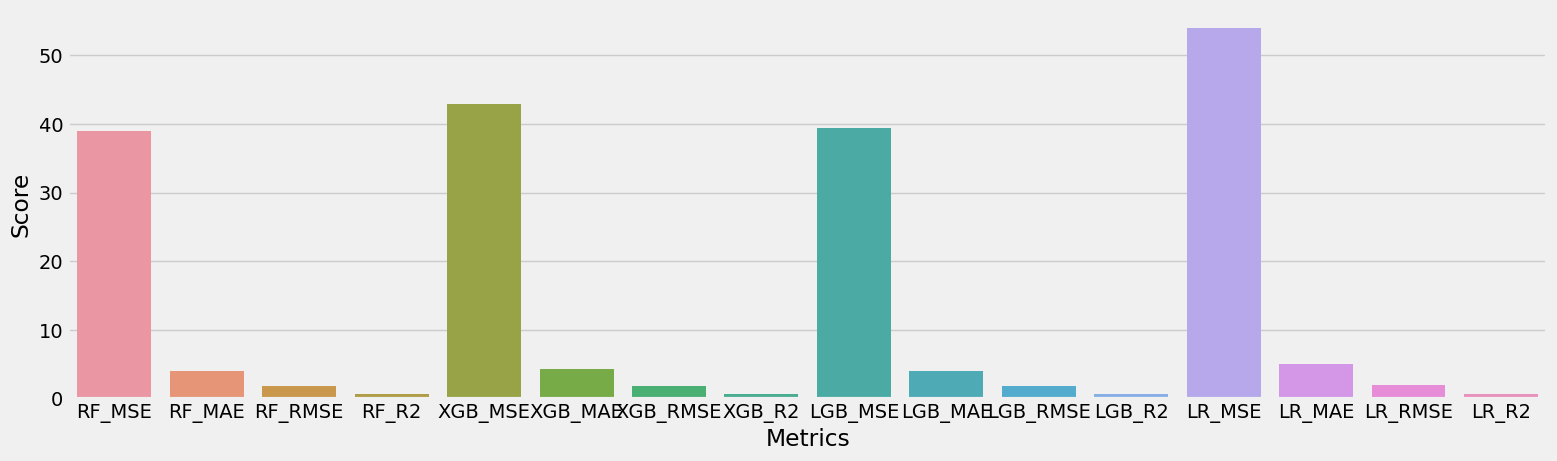

In [50]:
import matplotlib.pyplot as plt
plt.figure().set_figwidth(17)
sns.barplot(x = 'Metrics',y = 'Score', data = df_score1)
plt.show()